In [18]:
import pandas as pd
from pathlib import Path
import seaborn as sns

In [19]:
dfs = []
for p in Path('./').glob('*/*.gold'):
    df = pd.read_json(p)
    df['part'] = p.parent
    df['lang'] = p.name.split('.')[0]
    dfs.append(df)

In [20]:
df = pd.concat(dfs, ignore_index=True)
df.head()

,tag,row,score,id,part,lang
0,T,0,4,train.comedi_english.0,train,english
1,T,1,4,train.comedi_english.1,train,english
2,T,2,4,train.comedi_english.2,train,english
3,T,3,4,train.comedi_english.3,train,english
4,T,4,4,train.comedi_english.4,train,english


In [21]:
df.score.value_counts()

4    35933
1     8154
3     6706
2     5327
Name: score, dtype: int64

In [22]:
len(df)

56120

In [23]:
df_origin = df
dfa = df.copy()
dfa['lang'] = 'all'
df = pd.concat([df,dfa])
print(len(df))

112240


In [26]:

dfa = df_origin.copy()
dfa = dfa[dfa.lang!='chinese']
dfa['lang'] = 'all-chinese'
df = pd.concat([df,dfa])
print(len(df))

154995


In [27]:
df.lang.value_counts()

all            56120
all-chinese    42755
chinese        13365
german          9942
russian         9155
english         6773
swedish         6328
spanish         5442
norwegian       5115
Name: lang, dtype: int64

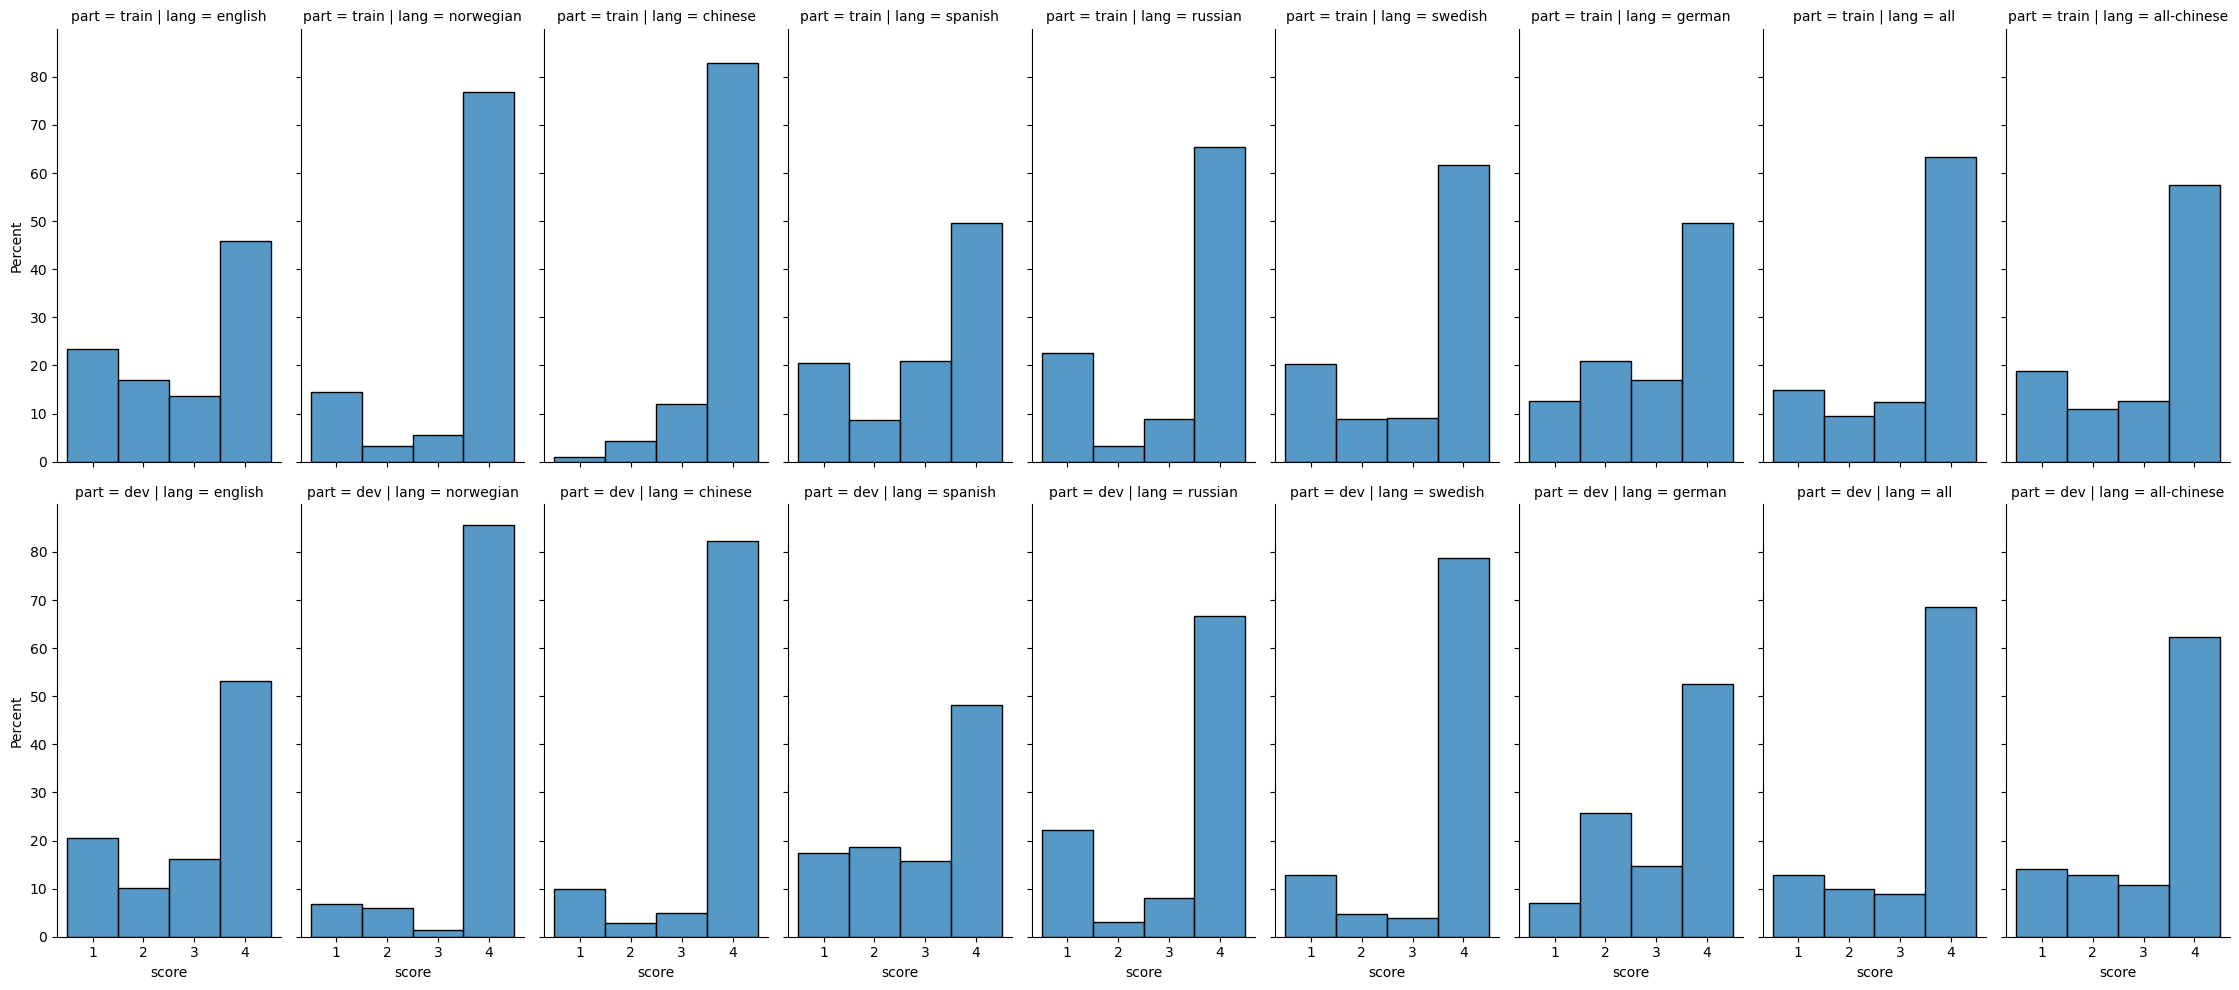

In [28]:
sns.displot(data=df, x='score', col='lang', row='part', kind='hist',
            stat='percent', discrete=True, common_norm=False,
            aspect=0.5)